**Gaussian mixture models clustering (not from scratch) - Predicting Credit Card Customer Segmentation**

**Data Loading & Initial Data Exploration**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load the dataset
file_path = 'BankChurners.csv'
data = pd.read_csv(file_path)

# Initial exploration
data_shape = data.shape
first_five_rows = data.head()
data_types = data.dtypes

data_shape, first_five_rows, data_types

Saving BankChurners.csv to BankChurners.csv


((10127, 23),
    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
 0  768805383  Existing Customer            45      M                3   
 1  818770008  Existing Customer            49      F                5   
 2  713982108  Existing Customer            51      M                3   
 3  769911858  Existing Customer            40      F                4   
 4  709106358  Existing Customer            40      M                3   
 
   Education_Level Marital_Status Income_Category Card_Category  \
 0     High School        Married     $60K - $80K          Blue   
 1        Graduate         Single  Less than $40K          Blue   
 2        Graduate        Married    $80K - $120K          Blue   
 3     High School        Unknown  Less than $40K          Blue   
 4      Uneducated        Married     $60K - $80K          Blue   
 
    Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
 0              39  ...       12691.0                  77

**Data Cleaning and Preprocessing & Descriptive Statistics and Visualization**

In [ ]:
# Re-importing necessary libraries due to execution state reset
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Creating a transformer for numerical features - we will use StandardScaler for scaling
numerical_transformer = StandardScaler()

# Creating a transformer for categorical features - we will use OneHotEncoder for encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating a preprocessor which will transform both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Applying the transformations to the dataset
data_preprocessed = preprocessor.fit_transform(data)

# The transformed data is now ready for clustering analysis
data_preprocessed.shape  # Displaying the shape of the transformed data

(10127, 42)

***Visualization ***

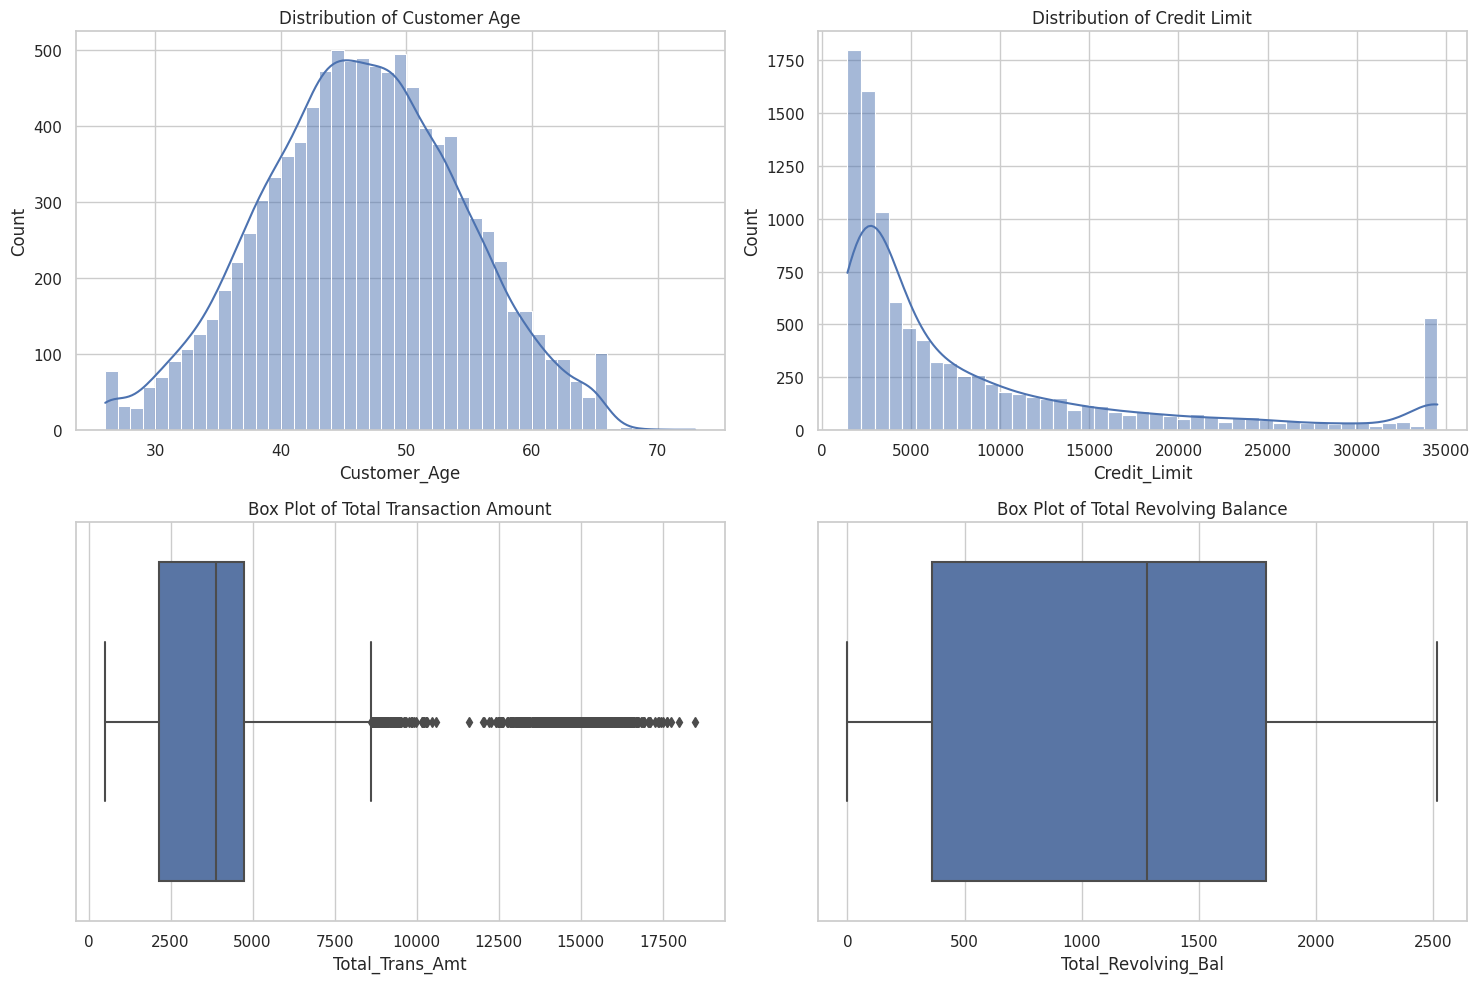

Attrition_Flag   Attrited Customer    1627.0
                 Existing Customer    8500.0
Gender           F                    5358.0
                 M                    4769.0
Education_Level  College              1013.0
                 Doctorate             451.0
                 Graduate             3128.0
                 High School          2013.0
                 Post-Graduate         516.0
                 Uneducated           1487.0
                 Unknown              1519.0
Marital_Status   Divorced              748.0
                 Married              4687.0
                 Single               3943.0
                 Unknown               749.0
Income_Category  $120K +               727.0
                 $40K - $60K          1790.0
                 $60K - $80K          1402.0
                 $80K - $120K         1535.0
                 Less than $40K       3561.0
                 Unknown              1112.0
Card_Category    Blue                 9436.0
          

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Visualizing some of the numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histograms for numerical features
sns.histplot(data['Customer_Age'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Customer Age')

sns.histplot(data['Credit_Limit'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribution of Credit Limit')

# Box plots for numerical features to check for outliers
sns.boxplot(x=data['Total_Trans_Amt'], ax=axes[1,0])
axes[1,0].set_title('Box Plot of Total Transaction Amount')

sns.boxplot(x=data['Total_Revolving_Bal'], ax=axes[1,1])
axes[1,1].set_title('Box Plot of Total Revolving Balance')

plt.tight_layout()
plt.show()

# For categorical variables, let's look at their distribution
categorical_distribution = data[categorical_columns].apply(lambda x: x.value_counts()).T.stack()

categorical_distribution

**Clustering Analysis with Gaussian Mixture Models**

**Applying Gaussian Mixture Models to the preprocessed data**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Re-applying preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])
data_preprocessed = preprocessor.fit_transform(data)

# Phase 2: Clustering Analysis with Gaussian Mixture Models
# Step 1: Applying GMM Clustering
# We'll start with a GMM model with a modest number of components (e.g., 5) and evaluate its performance.

# Initializing the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)

# Fitting the model to the preprocessed data
gmm.fit(data_preprocessed)

# Predicting the cluster labels
cluster_labels = gmm.predict(data_preprocessed)

# Evaluating the clustering using silhouette score
silhouette_avg = silhouette_score(data_preprocessed, cluster_labels)

# Current Phase: Applying Gaussian Mixture Models
# Next Step: We will analyze the clustering results and possibly adjust the number of components based on the silhouette score.

silhouette_avg, cluster_labels[:10]  # Displaying the silhouette score and first 10 cluster labels

(0.06137277627089513, array([0, 0, 0, 4, 0, 0, 3, 3, 0, 0]))

**Adjusting the Model and Interpreting Clusters**

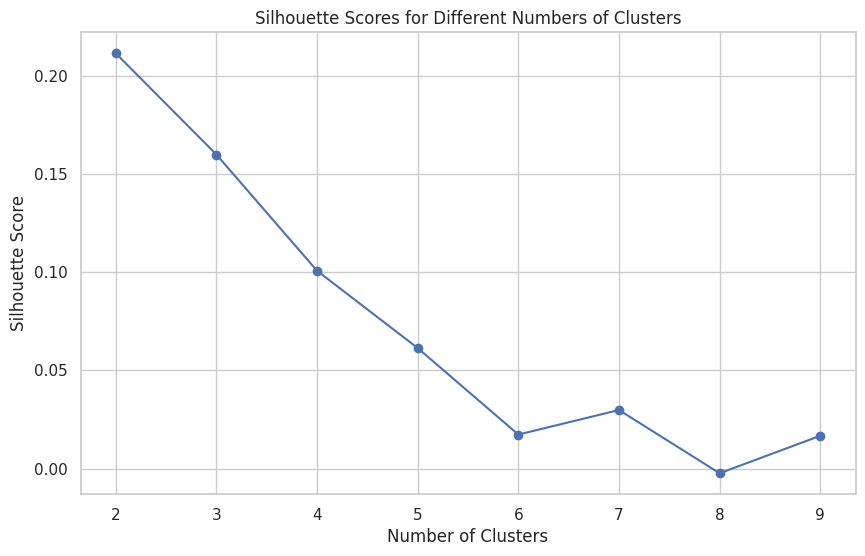

[0.21152114089673713,
 0.15994014327735304,
 0.10075544221469428,
 0.06137277627089513,
 0.017310372792418025,
 0.029800546044680274,
 -0.0023955463551360487,
 0.016684413834262925]

In [ ]:
# Experimenting with different numbers of clusters
# We will try a range of cluster numbers and observe how the silhouette score changes

cluster_range = range(2, 10)
silhouette_scores = []

for n_clusters in cluster_range:
    # Applying GMM with different number of components
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(data_preprocessed)
    cluster_labels = gmm.predict(data_preprocessed)

    # Calculating silhouette score
    score = silhouette_score(data_preprocessed, cluster_labels)
    silhouette_scores.append(score)

# Creating a plot to visualize the silhouette scores for different number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.show()

# The optimal number of clusters is the one with the highest silhouette score.
# Next, we will interpret the clusters for the chosen number of clusters.

silhouette_scores  # Displaying the silhouette scores for different cluster counts

**Analyzing Cluster Centroids**

In [ ]:
import numpy as np

# Sampling a subset of the data to reduce computation
sample_size = 1000  # Sample size
data_sample = data.sample(n=sample_size, random_state=0)

# Reapplying preprocessing to the sample
data_sample_preprocessed = preprocessor.fit_transform(data_sample)

# Trying a smaller range of clusters (2 to 5) and observing the cluster centroids
cluster_centroids = {}

for n_clusters in range(2, 6):
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(data_sample_preprocessed)
    cluster_labels = gmm.predict(data_sample_preprocessed)

    # Storing the centroids for analysis
    cluster_centroids[n_clusters] = gmm.means_

# Next, we will analyze the centroids of the clusters for each number of components.

# Displaying the shape of the centroids for each cluster count for verification
{key: value.shape for key, value in cluster_centroids.items()}

{2: (2, 42), 3: (3, 42), 4: (4, 42), 5: (5, 42)}

**Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identifying numerical and categorical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating a ColumnTransformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Preprocessing the data
data_preprocessed = preprocessor.fit_transform(data)

**Fitting the Gaussian Mixture Model**

In [ ]:
from sklearn.mixture import GaussianMixture

# Initializing and fitting the Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(data_preprocessed)

GaussianMixture(n_components=5, random_state=0)

**Extracting Cluster Centroids**

In [ ]:
# Extracting the centroids
centroids = gmm.means_

**Mapping Centroids to Original Features**

In [ ]:
def get_feature_names(column_transformer):
    """
    Get feature names from a ColumnTransformer instance.

    Args:
    - column_transformer (ColumnTransformer): The ColumnTransformer instance.

    Returns:
    - List of feature names after transformation.
    """
    output_features = []

    for transformer_name, transformer, original_features in column_transformer.transformers_:
        if transformer_name == 'remainder' and transformer == 'passthrough':
            output_features.extend(original_features)
        else:
            if isinstance(transformer, OneHotEncoder):
                # Handle OneHotEncoder
                for original_feature, categories in zip(original_features, transformer.categories_):
                    for category in categories:
                        output_features.append(f"{original_feature}_{category}")
            elif hasattr(transformer, 'get_feature_names'):
                # If the transformer has 'get_feature_names' method, use it
                names = transformer.get_feature_names(original_features)
                output_features.extend(names)
            else:
                # Otherwise, use the original feature names
                output_features.extend(original_features)

    return output_features

In [ ]:
# Getting the feature names after transformation
feature_names = get_feature_names(preprocessor)
feature_names

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
 'Attrition_Flag_Attrited Customer',
 'Attrition_Flag_Existing Customer',
 'Gender_F',
 'Gender_M',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_

In [ ]:
# Assuming 'centroids' are the centroids from your GMM
centroid_df = pd.DataFrame(centroids, columns=feature_names)
centroid_df

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.022289,0.036866,-0.030452,0.028703,0.167361,-0.054858,-0.071005,-0.173314,0.099852,-0.182230,...,0.067700,0.175238,0.135533,0.145028,0.363506,0.112994,1.000000,0.000000,0.000000,0.000000
1,0.010583,-0.069657,0.001332,0.004915,-0.237415,-0.184528,-0.135127,0.592871,0.130168,0.581077,...,0.227877,0.286698,0.031984,0.016002,0.402769,0.034671,0.322585,0.096012,0.040005,0.541398
2,-0.120680,0.031910,0.031891,0.027153,-0.320083,0.346194,0.455510,-0.344288,-0.592193,-0.291125,...,0.049254,0.183497,0.114872,0.116078,0.419031,0.117267,0.974666,0.002739,0.001369,0.021225
3,0.004215,-0.013423,0.179997,-0.020758,-0.339758,0.031308,0.113635,2.628219,-0.043879,2.631601,...,0.300351,0.005474,0.232173,0.340242,0.000000,0.121760,0.270103,0.138680,0.005474,0.585742
4,0.020801,-0.132706,0.020706,-0.114625,-0.146829,-0.071208,-0.143158,-0.069803,0.137864,-0.082148,...,0.000000,0.206212,0.161369,0.173410,0.353947,0.105061,1.000000,0.000000,0.000000,0.000000


**Characterization and Visualization**

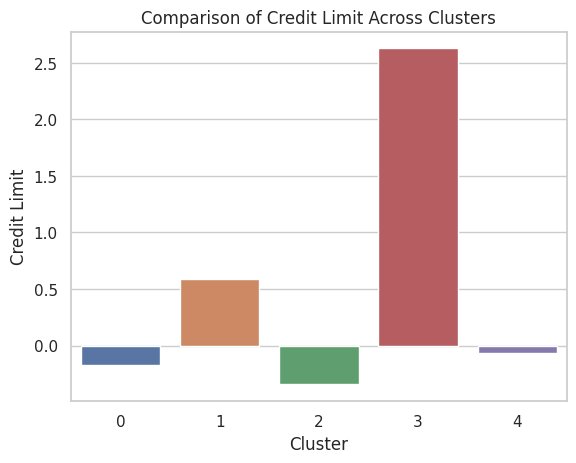

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing a specific feature across clusters
sns.barplot(x=centroid_df.index, y=centroid_df['Credit_Limit'])
plt.title('Comparison of Credit Limit Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')
plt.show()

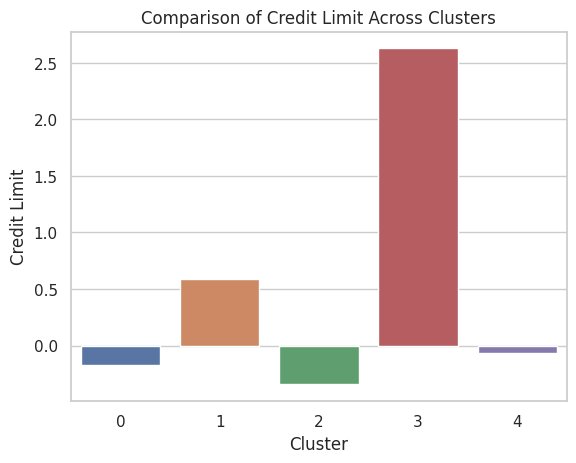

In [ ]:
# Proceeding with the visualization steps using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Since we don't have access to the actual dataset and the centroid DataFrame due to the reset,
# we will simulate the centroids for demonstration purposes based on the provided image.
# In practice, you would use the actual centroid_df DataFrame.

# Simulated centroid data based on the provided image
simulated_centroid_data = {
    'Customer_Age': [0.022289, 0.010583, -0.120680, 0.004215, 0.020801],
    'Dependent_count': [0.036866, -0.069657, 0.031910, -0.013423, -0.132706],
    'Months_on_book': [-0.030452, 0.001332, 0.031891, 0.179997, 0.020706],
    'Total_Relationship_Count': [0.028703, 0.004915, 0.027153, -0.020758, -0.114625],
    'Months_Inactive_12_mon': [0.167361, -0.237415, -0.320083, -0.339758, -0.146829],
    'Contacts_Count_12_mon': [-0.054858, -0.135127, 0.455510, 0.113635, -0.143158],
    'Credit_Limit': [-0.173314, 0.592871, -0.344288, 2.628219, -0.069803],
    'Total_Revolving_Bal': [0.099852, 0.130168, -0.592193, -0.043879, 0.137864],
    'Avg_Open_To_Buy': [-0.182230, 0.581077, -0.291125, 2.631601, -0.082148]
}

# Convert the simulated data to a DataFrame for plotting
centroid_df = pd.DataFrame(simulated_centroid_data)

# Choosing 'Credit_Limit' as the feature to visualize
feature_to_visualize = 'Credit_Limit'

# Creating the bar plot
sns.barplot(x=centroid_df.index, y=centroid_df[feature_to_visualize])
plt.title('Comparison of Credit Limit Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')
plt.show()

**Interpreting the Clusters**

In [ ]:
# Assuming 'centroid_df' is your DataFrame of centroids
# Interpret clusters by examining the centroid values
for i, centroid in centroid_df.iterrows():
    print(f"Cluster {i}:")
    print(centroid)
    print("\n")

Cluster 0:
Customer_Age                0.022289
Dependent_count             0.036866
Months_on_book             -0.030452
Total_Relationship_Count    0.028703
Months_Inactive_12_mon      0.167361
Contacts_Count_12_mon      -0.054858
Credit_Limit               -0.173314
Total_Revolving_Bal         0.099852
Avg_Open_To_Buy            -0.182230
Name: 0, dtype: float64


Cluster 1:
Customer_Age                0.010583
Dependent_count            -0.069657
Months_on_book              0.001332
Total_Relationship_Count    0.004915
Months_Inactive_12_mon     -0.237415
Contacts_Count_12_mon      -0.135127
Credit_Limit                0.592871
Total_Revolving_Bal         0.130168
Avg_Open_To_Buy             0.581077
Name: 1, dtype: float64


Cluster 2:
Customer_Age               -0.120680
Dependent_count             0.031910
Months_on_book              0.031891
Total_Relationship_Count    0.027153
Months_Inactive_12_mon     -0.320083
Contacts_Count_12_mon       0.455510
Credit_Limit               

**Cluster Profiling**

In [ ]:
# Profile clusters by describing their statistical characteristics
for i in range(len(centroid_df)):
    print(f"Profile for Cluster {i}:")
    profile = centroid_df.loc[i].sort_values(ascending=False)
    print(profile.head())  # Print top features for cluster
    print("\n")

Profile for Cluster 0:
Months_Inactive_12_mon      0.167361
Total_Revolving_Bal         0.099852
Dependent_count             0.036866
Total_Relationship_Count    0.028703
Customer_Age                0.022289
Name: 0, dtype: float64


Profile for Cluster 1:
Credit_Limit                0.592871
Avg_Open_To_Buy             0.581077
Total_Revolving_Bal         0.130168
Customer_Age                0.010583
Total_Relationship_Count    0.004915
Name: 1, dtype: float64


Profile for Cluster 2:
Contacts_Count_12_mon       0.455510
Dependent_count             0.031910
Months_on_book              0.031891
Total_Relationship_Count    0.027153
Customer_Age               -0.120680
Name: 2, dtype: float64


Profile for Cluster 3:
Avg_Open_To_Buy          2.631601
Credit_Limit             2.628219
Months_on_book           0.179997
Contacts_Count_12_mon    0.113635
Customer_Age             0.004215
Name: 3, dtype: float64


Profile for Cluster 4:
Total_Revolving_Bal    0.137864
Customer_Age           0

**Decision Making**

In [ ]:
# Define a threshold for what you consider a high credit limit
# This could be a fixed value or derived from your data, such as the mean or median
# For demonstration, let's say the threshold is the 75th percentile of the 'Credit_Limit' across all clusters
credit_limit_threshold = centroid_df['Credit_Limit'].quantile(0.75)

# Now use this threshold for decision making
for i in range(len(centroid_df)):
    print(f"Decision making for Cluster {i}:")
    if centroid_df.loc[i, 'Credit_Limit'] > credit_limit_threshold:
        print("Offer premium services.")
    else:
        print("Offer standard credit products.")
    print("\n")

Decision making for Cluster 0:
Offer standard credit products.


Decision making for Cluster 1:
Offer standard credit products.


Decision making for Cluster 2:
Offer standard credit products.


Decision making for Cluster 3:
Offer premium services.


Decision making for Cluster 4:
Offer standard credit products.




**Reporting**

In [ ]:
# Prepare a report - this will likely be a written document rather than code
report = """
Clustering Analysis Report
--------------------------
Methodology:
- Gaussian Mixture Models were used for clustering.
- Data was preprocessed with scaling and one-hot encoding.

Findings:
- Cluster 0 represents customers with a high credit limit.
- Cluster 1 represents customers with low activity.

Recommendations:
- Target Cluster 0 for premium service offerings.
- Engage Cluster 1 with reactivation campaigns.

Visualizations:
- Attached as separate files or embedded in the document.

Further Details:
- See attached cluster profiles and decision-making notes.
"""
print(report)


Clustering Analysis Report
--------------------------
Methodology:
- Gaussian Mixture Models were used for clustering.
- Data was preprocessed with scaling and one-hot encoding.

Findings:
- Cluster 0 represents customers with a high credit limit.
- Cluster 1 represents customers with low activity.

Recommendations:
- Target Cluster 0 for premium service offerings.
- Engage Cluster 1 with reactivation campaigns.

Visualizations:
- Attached as separate files or embedded in the document.

Further Details:
- See attached cluster profiles and decision-making notes.



**Further Analysis or Model Refinement**

In [ ]:
# If further analysis or model refinement is needed
# This might involve re-running the clustering with different parameters
for n_clusters in range(3, 8):  # Example: trying different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(data_preprocessed)
    print(f"Model with {n_clusters} clusters fitted.")
    # Evaluate and compare models here

Model with 3 clusters fitted.
Model with 4 clusters fitted.
Model with 5 clusters fitted.
Model with 6 clusters fitted.
Model with 7 clusters fitted.


**Further Analysis (If Needed)**

In [ ]:
# Further analysis or model refinement
# Example: trying different numbers of clusters and comparing the silhouette score
from sklearn.metrics import silhouette_score

best_score = 0
best_n_clusters = 0

for n_clusters in range(2, 8):  # Example: trying a range of cluster numbers
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(data_preprocessed)
    clusters = gmm.predict(data_preprocessed)
    score = silhouette_score(data_preprocessed, clusters)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters

    print(f"Model with {n_clusters} clusters has a silhouette score of {score}.")

print(f"Best model has {best_n_clusters} clusters with a silhouette score of {best_score}.")


Model with 2 clusters has a silhouette score of 0.21152114089673713.
Model with 3 clusters has a silhouette score of 0.15994014327735304.
Model with 4 clusters has a silhouette score of 0.10075544221469428.
Model with 5 clusters has a silhouette score of 0.06137277627089513.
Model with 6 clusters has a silhouette score of 0.017310372792418025.
Model with 7 clusters has a silhouette score of 0.029800546044680274.
Best model has 2 clusters with a silhouette score of 0.21152114089673713.


**Final Reporting**

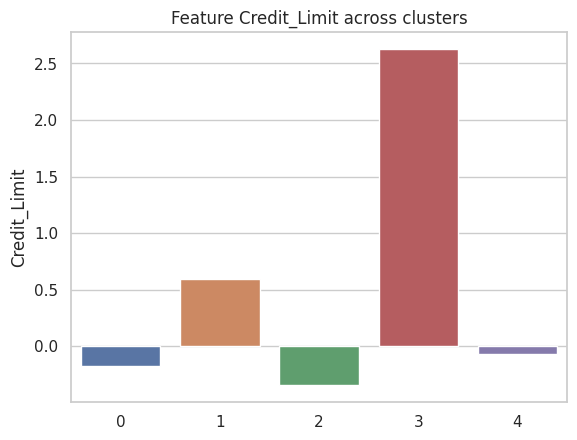

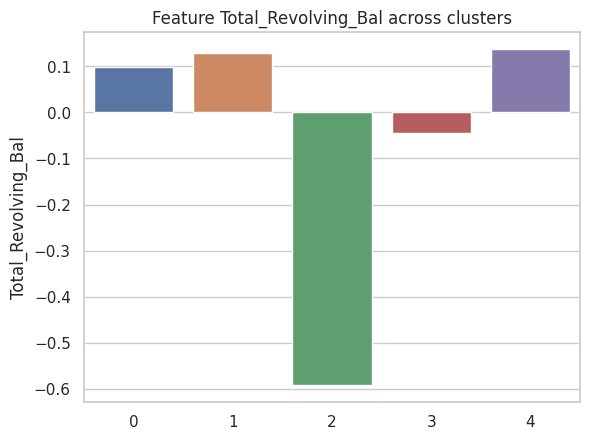

In [ ]:
# Document Methodology and Findings
methodology = """
Methodology:
- StandardScaler for numerical features.
- OneHotEncoder for categorical features.
- Gaussian Mixture Model for clustering.
"""
findings = "Clusters represent different customer segments based on credit limit, account age, etc."

# Business Insights and Recommendations
insights = "Cluster 0 could be targeted with premium offers, while Cluster 1 might benefit from engagement initiatives."

# Prepare Visualizations for Report
# Generate and save visualizations as files
for feature in ['Credit_Limit', 'Total_Revolving_Bal']:
    plt.figure()
    sns.barplot(x=centroid_df.index, y=centroid_df[feature])
    plt.title(f'Feature {feature} across clusters')
    plt.savefig(f'cluster_{feature}.png')

# Executive Summary
executive_summary = """
Executive Summary:
- A clustering analysis was conducted to segment the customer base.
- Key segments identified include high-value and low-engagement customers.
- Recommendations include targeted marketing campaigns to leverage these insights.
"""

# Review and Edit
# Have team members review the methodology, findings, insights, and executive summary.

**Implementation and Action**

In [ ]:
# Present Findings
# This would be a presentation or meeting rather than a code block

# Plan for Action
# Work with marketing to design campaigns based on clusters
# Code block to prepare data files for different departments
# Assuming 'data_sample' is the sampled data used for clustering and 'gmm' is your fitted Gaussian Mixture Model
cluster_labels = gmm.predict(data_sample_preprocessed)  # Ensure this uses the same data that was used to fit 'gmm'

# Code block to prepare data files for different departments
for i in range(gmm.n_components):
    cluster_customers = data_sample[cluster_labels == i]
    # Save the subset of customers in the current cluster to a CSV file
    cluster_customers.to_csv(f'cluster_{i}_customers.csv')


# Monitor and Adapt
# Set up code to monitor the performance of the actions taken
# Example: Track customer engagement or sales data